In [21]:
from problem import make_problem
from viz import make_plot, make_meshgrid

In [22]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=0.025)

In [23]:
N_SAMPLES = 10000
TEST_SIZE = 0.1
H = .02  # step size in the mesh

X_train, X_test, y_train, y_test = make_problem(N_SAMPLES, TEST_SIZE)

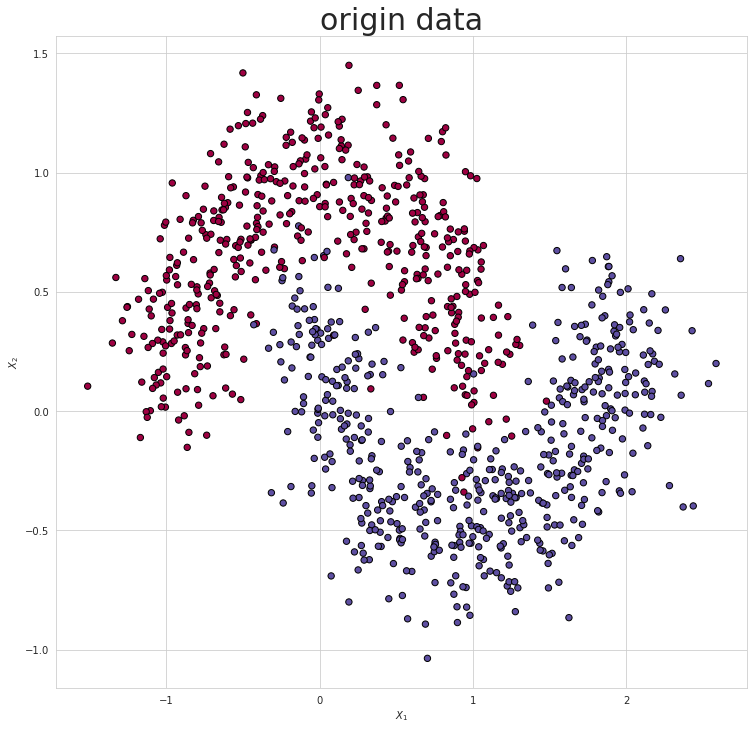

In [24]:
make_plot(X_test, y_test, "origin data")

In [25]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print(X_train[:5])
print(y_train[:5])

X_train.shape (9000, 2)
y_train.shape (9000,)
[[-0.93412417  0.85643035]
 [ 0.90432593 -0.59934325]
 [-0.06486915 -0.13116748]
 [ 0.21450962  0.31981618]
 [ 1.82655194 -0.33133109]]
[0 1 1 1 1]


## Train

In [26]:
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [27]:
print('score', score)


score 0.886


## Meshgrid

In [28]:
xx, yy, mesh_reshaped = make_meshgrid(X_train, H)
print(xx.shape) # (186, 258)
print(yy.shape) # (186, 258)

(186, 258)
(186, 258)


In [29]:
print('has decision_function', hasattr(model, "decision_function"))
Z = model.decision_function(mesh_reshaped)
Z[:5]

has decision_function True


array([2.57488977, 2.59028495, 2.60568012, 2.62107529, 2.63647046])

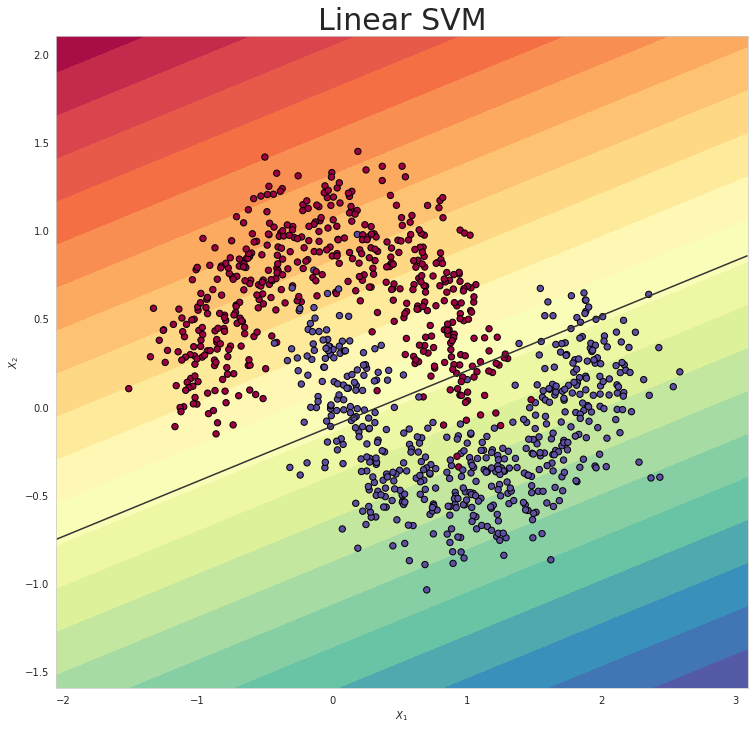

In [30]:
make_plot(X_test, y_test, "Linear SVM", XX=xx, YY=yy, preds=Z)